<a href="https://colab.research.google.com/github/gustavomachin/RendimientoAcademico/blob/main/notebooks/DA_Clasificaci%C3%B3n_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Algoritmos de clasificación**

## **Actualización de Scikit-Lear**n

In [ ]:
!pip install scikit-learn --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Carga de librerías necesarias**

Para analisis exploratorio de datos

In [ ]:
import pandas as pd
import numpy as np

Para aprendizaje automático

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

Otros módulos de scikitlearn

In [ ]:
import sklearn
import sklearn.metrics as metrics 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.tree import plot_tree

Para visualizaciones

In [ ]:
import matplotlib.pyplot as plt 
import plotly.express as px

## **Carga y análisis exploratorio de los datos**

### **Extracción de Datos - Creación del DataFrame**

Se utilizará el conjunto de datos de los alumnos de la Facultad de Ciencias Económicas de la Universidad Nacional de Cuyo, en sus carreras principales: Contador Público Nacional y Perito Partidor, Licenciatura en Administración, Licenciatura en Economía y Licenciatura en Logística. La muestra está compuesta por 2891 alumnos (registros) que en 2020 se encuentraban cursando alguna de las carreras anteriormente mencionadas.

**Variables:** 

* **Desemp3NR:** combina la nota promedio obtenida por el alumno y la regularidad demostrada en los estudios (materias aprobadas por año). Se considerará éxito académico (1) cuando el indicador sea mayor o igual a 28 (7 de promedio y 4 materias aprobadas por año), clasificando los demás casos como fracaso académico (0). *Bartolomeo y Machín (2021); Porto y Di Gresia (2005)* 
* **Edad:** del alumno (numérica discreta).
* **CantidadHijos:** del alumno (numérica discreta).
* **Género:** este factor tiene dos niveles posibles (hombre o mujer).
* **Carrera:** este factor tiene cuatro niveles posibles: LE (Licenciatura en
Economía), LA (Licenciatura en Administración), CPN (Contador Público
Nacional y Perito Partidor) y LLO (Licenciatura en Logística).
* **Trabajo:** indica si el alumno se encuentra trabajando o no
* **Beca:** indica si el alumno tiene algún tipo de beca, ya sea del gobierno
(nacional, provincial o municipal) u otorgada por la propia universidad.
* **EstadoCivil:** este factor tiene tres categorías: soltero, casado y otro; esta última incluye separado, divorciado y viudo.

In [ ]:
data_url = "https://raw.githubusercontent.com/gustavomachin/RendimientoAcademico/main/AlumnosFCE_custom%20(2).csv"
data = pd.read_csv(data_url, index_col=0)
data.head()

,Carrera,Edad,Trabajo,Beca,Genero,EstadoCivil,CantidadHijos,Prom_cAplazo,A/P,Desemp1R,Desemp2N,Desemp3RN
0,CPN,25,N,N,F,Soltero,0,6.66,4.571429,1,0,1
1,LA,25,S,N,M,Soltero,0,7.85,5.142857,1,1,1
2,CPN,26,N,S,M,Soltero,0,6.88,3.428571,0,0,0
3,CPN,24,N,S,F,Soltero,0,6.93,3.428571,0,0,0
4,CPN,25,S,N,F,Soltero,0,6.54,5.142857,1,0,1


### **Limpieza del DataFrame**

In [ ]:
data = data.drop(labels=['Prom_cAplazo','A/P', 'Desemp1R', 'Desemp2N'], axis=1)
data.head()

,Carrera,Edad,Trabajo,Beca,Genero,EstadoCivil,CantidadHijos,Desemp3RN
0,CPN,25,N,N,F,Soltero,0,1
1,LA,25,S,N,M,Soltero,0,1
2,CPN,26,N,S,M,Soltero,0,0
3,CPN,24,N,S,F,Soltero,0,0
4,CPN,25,S,N,F,Soltero,0,1


In [ ]:
data.rename(columns={"Desemp3RN":"Desemp"}, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2891 entries, 0 to 2890
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Carrera        2891 non-null   object
 1   Edad           2891 non-null   int64 
 2   Trabajo        2891 non-null   object
 3   Beca           2891 non-null   object
 4   Genero         2891 non-null   object
 5   EstadoCivil    2891 non-null   object
 6   CantidadHijos  2891 non-null   int64 
 7   Desemp         2891 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 203.3+ KB


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')
#data.to_csv("/content/drive/My Drive/AlumnosCustomWeka.csv", index=False)

In [ ]:
data.Desemp.value_counts()

0    1746
1    1145
Name: Desemp, dtype: int64

In [ ]:
data.select_dtypes(include=["object"]).describe()

,Carrera,Trabajo,Beca,Genero,EstadoCivil
count,2891,2891,2891,2891,2891
unique,4,2,2,2,3
top,CPN,N,N,F,Soltero
freq,1772,1795,2617,1707,2696


In [ ]:
data.describe()

,Edad,CantidadHijos,Desemp
count,2891.000000,2891.000000,2891.000000
mean,25.455898,0.131442,0.396057
std,5.120119,0.474269,0.489161
min,19.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000
50%,24.000000,0.000000,0.000000
75%,28.000000,0.000000,1.000000
max,60.000000,3.000000,1.000000


## **Codificación del DataFrame**

In [ ]:
data = pd.get_dummies(data, columns=["Carrera","Trabajo","Beca","Genero","EstadoCivil"])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2891 entries, 0 to 2890
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Edad                 2891 non-null   int64
 1   CantidadHijos        2891 non-null   int64
 2   Desemp               2891 non-null   int64
 3   Carrera_CPN          2891 non-null   uint8
 4   Carrera_LA           2891 non-null   uint8
 5   Carrera_LE           2891 non-null   uint8
 6   Carrera_LLO          2891 non-null   uint8
 7   Trabajo_N            2891 non-null   uint8
 8   Trabajo_S            2891 non-null   uint8
 9   Beca_N               2891 non-null   uint8
 10  Beca_S               2891 non-null   uint8
 11  Genero_F             2891 non-null   uint8
 12  Genero_M             2891 non-null   uint8
 13  EstadoCivil_Casado   2891 non-null   uint8
 14  EstadoCivil_Otro     2891 non-null   uint8
 15  EstadoCivil_Soltero  2891 non-null   uint8
dtypes: int64(3), uint8(13)
m

## **División del conjunto de entrenamiento y testeo**

In [ ]:
y = data.Desemp

In [ ]:
y

0       1
1       1
2       0
3       0
4       1
       ..
2886    0
2887    0
2888    0
2889    1
2890    1
Name: Desemp, Length: 2891, dtype: int64

In [ ]:
X = data.drop(columns=["Desemp"])

In [ ]:
X

,Edad,CantidadHijos,Carrera_CPN,Carrera_LA,Carrera_LE,Carrera_LLO,Trabajo_N,Trabajo_S,Beca_N,Beca_S,Genero_F,Genero_M,EstadoCivil_Casado,EstadoCivil_Otro,EstadoCivil_Soltero
0,25,0,1,0,0,0,1,0,1,0,1,0,0,0,1
1,25,0,0,1,0,0,0,1,1,0,0,1,0,0,1
2,26,0,1,0,0,0,1,0,0,1,0,1,0,0,1
3,24,0,1,0,0,0,1,0,0,1,1,0,0,0,1
4,25,0,1,0,0,0,0,1,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2886,32,0,0,0,0,1,0,1,1,0,0,1,0,0,1
2887,20,0,0,1,0,0,1,0,1,0,1,0,0,0,1
2888,20,0,0,1,0,0,1,0,1,0,0,1,0,0,1
2889,45,3,0,0,0,1,0,1,1,0,1,0,1,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size   = 0.75, random_state = 0)

In [ ]:
X_train.shape

(2168, 15)

In [ ]:
X_test.shape

(723, 15)

In [ ]:
y_train.shape

(2168,)

In [ ]:
y_test.shape

(723,)

## **Regresión logística**

In [ ]:
lr_model = LogisticRegression(max_iter= 1000)

In [ ]:
lr_model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
prob = lr_model.predict_proba(X_test)
prob

array([[0.46019929, 0.53980071],
       [0.65459422, 0.34540578],
       [0.75045614, 0.24954386],
       ...,
       [0.52665927, 0.47334073],
       [0.59218778, 0.40781222],
       [0.98019059, 0.01980941]])

In [ ]:
y_pred_lr = lr_model.predict(X_test)
y_pred_lr

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,

In [ ]:
cuadro = pd.DataFrame()
cuadro["Real"] = y_test
cuadro["Predicción"] = y_pred_lr
cuadro

,Real,Predicción
1157,0,1
2254,1,0
2299,0,0
298,0,0
488,0,0
...,...,...
751,0,0
1043,1,1
1002,0,0
653,0,0


In [ ]:
mc = metrics.confusion_matrix(y_test, y_pred_lr)
print(mc)

[[309 104]
 [125 185]]


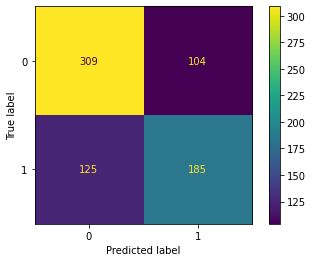

In [ ]:
cm = confusion_matrix(y_test, y_pred_lr, labels=lr_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model.classes_)
disp.plot();

In [ ]:
reporte = metrics.classification_report(y_test, y_pred_lr)
print(reporte)

              precision    recall  f1-score   support

           0       0.71      0.75      0.73       413
           1       0.64      0.60      0.62       310

    accuracy                           0.68       723
   macro avg       0.68      0.67      0.67       723
weighted avg       0.68      0.68      0.68       723



In [ ]:
prob = lr_model.predict_proba(X_test)
auc = metrics.roc_auc_score(y_test, prob[:,1])
auc = round(auc,2)

* tpr (true positive rate, recall): $\frac{VP}{VP+FN}$
* fpr (false positive rate, 1 - specificity): $1-\frac{VN}{VN+FP}$

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, prob[:,1])
fig = px.area(x=fpr, y=tpr,
              title=f'Curva ROC (AUC={auc})',
              labels=dict(x='Tasa de Falso Positivo', y='Tasa de Verdadero Positivo'),
              width=500, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)
fig.show()

## **Árbol de decisión**

In [ ]:
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_leaf=4, min_samples_split=10)

In [ ]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=4, min_samples_split=10)

In [ ]:
prob = dt_model.predict_proba(X_test)

In [ ]:
y_pred_dt = dt_model.predict(X_test)
y_pred_dt

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,

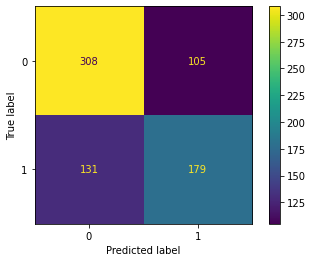

In [ ]:
cm = confusion_matrix(y_test, y_pred_dt, labels=dt_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_model.classes_)
disp.plot();

In [ ]:
reporte = metrics.classification_report(y_test, y_pred_dt)
print(reporte)

              precision    recall  f1-score   support

           0       0.70      0.75      0.72       413
           1       0.63      0.58      0.60       310

    accuracy                           0.67       723
   macro avg       0.67      0.66      0.66       723
weighted avg       0.67      0.67      0.67       723



## **Bosque Aleatorio**

In [ ]:
rf_model = RandomForestClassifier(n_estimators=150)

In [ ]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=150)

In [ ]:
prob = rf_model.predict_proba(X_test)

In [ ]:
y_pred_rf = rf_model.predict(X_test)
y_pred_rf

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,

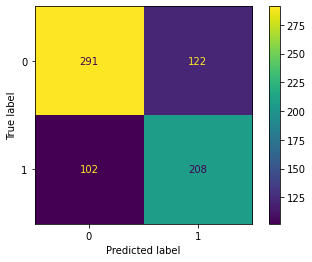

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf, labels=rf_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot();

In [ ]:
reporte = metrics.classification_report(y_test, y_pred_rf)
print(reporte)

              precision    recall  f1-score   support

           0       0.74      0.70      0.72       413
           1       0.63      0.67      0.65       310

    accuracy                           0.69       723
   macro avg       0.69      0.69      0.69       723
weighted avg       0.69      0.69      0.69       723



## **Bayes Ingenuo**

In [ ]:
nb_model = GaussianNB()

In [ ]:
nb_model.fit(X_train,y_train)

GaussianNB()

In [ ]:
prob = nb_model.predict_proba(X_test)

In [ ]:
y_pred_nb = nb_model.predict(X_test)
y_pred_nb

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,

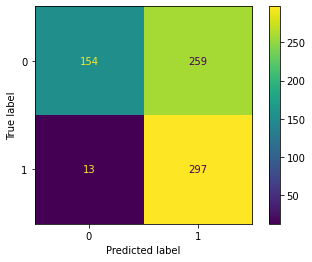

In [ ]:
cm = confusion_matrix(y_test, y_pred_nb, labels=nb_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb_model.classes_)
disp.plot();

In [ ]:
reporte = metrics.classification_report(y_test, y_pred_nb)
print(reporte)

              precision    recall  f1-score   support

           0       0.92      0.37      0.53       413
           1       0.53      0.96      0.69       310

    accuracy                           0.62       723
   macro avg       0.73      0.67      0.61       723
weighted avg       0.76      0.62      0.60       723



## **K Vecinos Cercanos**

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=50)

In [ ]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=50)

In [ ]:
prob = knn_model.predict_proba(X_test)

In [ ]:
y_pred_knn = knn_model.predict(X_test)
y_pred_knn

array([1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,

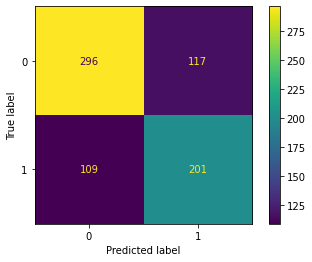

In [ ]:
cm = confusion_matrix(y_test, y_pred_knn, labels=knn_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_model.classes_)
disp.plot();

In [ ]:
reporte = metrics.classification_report(y_test, y_pred_knn)
print(reporte)

              precision    recall  f1-score   support

           0       0.73      0.72      0.72       413
           1       0.63      0.65      0.64       310

    accuracy                           0.69       723
   macro avg       0.68      0.68      0.68       723
weighted avg       0.69      0.69      0.69       723

